In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import re
import json
import ast
from sklearn.cluster import KMeans

# 1.DATA PROCESSING

## a. Import and concatenate

### i) Import all city’s dataset  - Unstructured format

In [2]:
df1 = pd.read_excel("bangalore_cars.xlsx")
df1

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [3]:
df2 = pd.read_excel("chennai_cars.xlsx")
# df2

In [4]:
df3 = pd.read_excel("delhi_cars.xlsx")
# df3

In [5]:
df4 = pd.read_excel("hyderabad_cars.xlsx")
# df4

In [6]:
df5 = pd.read_excel("jaipur_cars.xlsx")
# df5

In [7]:
df6 = pd.read_excel("kolkata_cars.xlsx")
# df6

### ii) Convert it into a  structured format.

In [8]:
def structure_data(df):
    d1_list = []
    d2_list = []
    d3_list = []
    d4_list = []
    d5_list = []
    for row in range(len(df)):
        a = df.iloc[row]["new_car_detail"]
        res = ast.literal_eval(a)
        d1_df = pd.DataFrame([res])
        d1_list.append(d1_df)
        
        b = df.iloc[row]["new_car_overview"]
        res = ast.literal_eval(b)
        d2_df = pd.DataFrame([res])
        key_lst=[]
        val_lst=[]
        for i in d2_df["top"]:
            for j in i:
                key_lst.append(j["key"])
                val_lst.append(j["value"])
        result = dict(zip(key_lst, val_lst))
        d2_df = pd.DataFrame([result])
        d2_list.append(d2_df)
        
        c = df.iloc[row]["new_car_feature"]
        res = ast.literal_eval(c)
        d3_df = pd.DataFrame()
        for i in res.keys():
            if i == 'heading':
                d3_df[res[i]] = [len(res["top"])]
            elif i == 'data':
                for a in res[i]:
                    for b in a:
                        if b == 'heading':
                            d3_df[a[b]] = [len(a["list"])]
        d3_list.append(d3_df)
        
        d = df.iloc[row]["new_car_specs"]
        res = ast.literal_eval(d)
        d4_df = pd.DataFrame()
        for i in res.keys():
            if i == 'top':
                for j in res[i]:
                    d4_df[j["key"]] = [j["value"]]
            elif i == 'data':
                for a in res[i]:
                    for b in a:
                        if b == 'heading':
                            d4_df[a[b]] = [len(a["list"])]
                        elif b == 'list':
                            for j in a[b]:
                                d4_df[j["key"]] = [j["value"]]
        d4_df = d4_df.rename(columns={'Seats':'Seats_capacity'})
        d4_list.append(d4_df)
        
        e = df.iloc[row]["car_links"]
        d5_df = pd.DataFrame([e])
        d5_list.append(d5_df) 
        
    d1 = pd.concat(d1_list, ignore_index=True)
    d2 = pd.concat(d2_list, ignore_index=True)
    d3 = pd.concat(d3_list, ignore_index=True)
    d4 = pd.concat(d4_list, ignore_index=True)
    d5 = pd.concat(d5_list, ignore_index=True)
    
    df = d1.join(d2).join(d3).join(d4).join(d5)
    df.rename(columns={0:"car_links"},inplace = True)
    
    return df

In [9]:
df1 = structure_data(df1)
df1

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,...,Drum,176 Kmph,9.6 Seconds,"Tubeless,Radial",5,296-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...
1477,0,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,...,Drum,177 kmph,12.1 seconds,"Tubeless, Radial",4,505 litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...
1478,0,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,...,Drum,164 Kmph,14.5 Seconds,"Tubeless,Radial",5,175-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1479,0,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,...,Drum,180 Kmph,11.9 Seconds,Tubeless,5,295-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...


In [10]:
df2 = structure_data(df2)
df2

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen,car_links
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,No,NaN,NaN,NaN,5.1 meters,172 Kmph,13.7 Seconds,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,...,No,1530mm,1530mm,1315kg,4.8 Meters,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1415,0,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,...,No,1560mm,1567mm,1777kg,5.2 metres,156 Kmph,13.9 Seconds,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1416,0,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,...,No,1540 mm,1530 mm,NaN,5.1m,154.19 kmph,NaN,77x85.8,209 mm,https://www.cardekho.com/used-car-details/used...
1417,0,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,...,No,1578mm,1568mm,2250kg,5.75meters,NaN,NaN,74.5 x 81 mm,NaN,https://www.cardekho.com/used-car-details/used...


In [11]:
df3 = structure_data(df3)
df3

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Turning Radius,Top Speed,Acceleration,Gross Weight,Front Tread,Rear Tread,BoreX Stroke,Compression Ratio,Ground Clearance Unladen,car_links
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,NaN,217 Kmph,NaN,2360kg,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,4.8,NaN,NaN,1335,1530,1530,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,Petrol,Sedan,"60,000",Automatic,1,1st Owner,Honda,Honda City,2019,...,5.3 metres,195 Kmph,10 Seconds,1455kg,1490mm,1480mm,73.0 X 89.4 mm,10.3:1,NaN,https://www.cardekho.com/used-car-details/used...
1481,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Kia,Kia Sonet,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1482,0,Petrol,Sedan,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2011,...,5.2 metres,196km/hr,10.5 Seconds,NaN,NaN,NaN,77.0mm X 85.44mm,10.5;1,NaN,https://www.cardekho.com/used-car-details/used...
1483,0,Diesel,SUV,"38,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019,...,5.3 metres,160.58kmph,10.83 s,NaN,NaN,NaN,NaN,NaN,190mm,https://www.cardekho.com/used-car-details/used...


In [12]:
df4 = structure_data(df4)
df4

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen,car_links
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,Disc,Drum,Tubeless,NaN,5,215-litres,135 Kmph,19 Seconds,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,Disc,Drum,"Tubeless, Radial",NaN,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,Disc,Drum,"Tubeless,Radial",16,5,339-litres,180 Kmph,12.36 seconds,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,Disc,Drum,"Radial, Tubeless",18,3,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,...,Disc & Caliper Type,Disc & Caliper Type,"Tubeless,Radial",17,5,NaN,175 kmph,12.5 Seconds,NaN,https://www.cardekho.com/used-car-details/used...
1479,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,...,Disc,Disc,"Tubeless,Radial",20,4,540-litres,250 Kmph,6.4 Seconds,NaN,https://www.cardekho.com/used-car-details/used...
1480,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,...,Ventilated Disc,Ventilated Disc,"Tubeless, Runflat",R18,4,520-litres,235kmph,7.5,NaN,https://www.cardekho.com/used-car-details/used...
1481,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,...,Disc,Drum,Tubeless Radial Tyres,NaN,5,350,154.19 kmph,13.25 Seconds,209 mm,https://www.cardekho.com/used-car-details/used...


In [13]:
df5 = structure_data(df5)
df5

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Gross Weight,BoreX Stroke,Compression Ratio,Ground Clearance Unladen,car_links
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,11.9 Seconds,Tubeless,16,5,295-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,NaN,"Radial, Tubeless",NaN,5,268,1335,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,15.05 Seconds,"Tubeless, Radial",NaN,5,235-litres,1250kg,73 X 82 mm,11.0:1,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,12.9 Seconds,Tubeless,NaN,5,256,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,18.6 Seconds,Tubeless Tyres,NaN,5,180-liters,1350kg,69 x 72 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,...,NaN,"Tubeless,Radial",14,5,170-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1116,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,...,17.7 seconds,"Tubeless,Radial",12,5,NaN,1140kg,68.5 x 72.0 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1117,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,...,NaN,"Tubeless, Radial",16,5,405,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1118,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,...,17.7 seconds,"Tubeless,Radial",12,5,NaN,1140kg,68.5 x 72.0 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...


In [14]:
df6 = structure_data(df6)
df6

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Ground Clearance Unladen,Cargo Volumn,Compression Ratio,Acceleration,Top Speed,car_links
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,Solid Disc,"Tubeless,Radial",17,4,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,Drum,NaN,NaN,5,185mm,222,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,Drum,"Tubeless, Radial",NaN,5,NaN,405,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Drum,"Tubeless,Radial",14,5,NaN,295 Lit,:1,12.96 Sec,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,Drum,"Tubeless,Radial",16,5,NaN,460-litres,NaN,8.2 Seconds,212 Kmph,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,Drum,"Tubeless, Radial",NaN,5,NaN,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1377,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Drum,Tubeless Tyres,NaN,5,NaN,177-litres,NaN,19 Seconds,140 kmph,https://www.cardekho.com/used-car-details/used...
1378,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Solid Disc,"Tubeless,Radial",17,4,NaN,475-litres,9.3:1,8.8 Seconds,230km/hr,https://www.cardekho.com/used-car-details/used...
1379,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Drum,"Tubeless,Radial",14,5,NaN,236-liters,NaN,15 Seconds,156 Kmph,https://www.cardekho.com/used-car-details/used...


### iii) Add a new column named ‘City’

In [15]:
df1["City"] = 'Bangalore'

In [16]:
df2["City"] = 'Chennai'

In [17]:
df3["City"] = 'Delhi'

In [18]:
df4["City"] = 'Hyderabad'

In [19]:
df5["City"] = 'Jaipur'

In [20]:
df6["City"] = 'Kolkata'

### iv) Concatenate all datasets

In [21]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [22]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,"Tubeless, Radial",5,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata


In [23]:
# df.to_excel('Structured_df.xlsx')

## b) Handling Missing Values

### Identify and fill or remove missing values in the dataset.
### i) For numerical columns, use techniques like mean or median imputation.
### ii) For categorical columns, use mode imputation or create a new category for missing values.

In [24]:
# pd.DataFrame(df.isnull().sum()).T.iloc[0,0:40]
pd.DataFrame(df.isnull().sum())

,0
it,0
ft,0
bt,0
km,0
transmission,0
...,...
Wheel Size,2983
Alloy Wheel Size,2983
Ground Clearance Unladen,7854
car_links,0


In [25]:
# Iterate through columns and their data types
for col, dtype in df.dtypes.items():
    non_null_count = df[col].notnull().sum()  # Non-null count per column

    # If the column is categorical (object) and has missing values
    if non_null_count < len(df) and dtype == 'object' and col != 'priceActual':
        # Ensure mode() is not empty before filling
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])

    # If the column is numeric and has missing values
    elif non_null_count < len(df):
        try:
            # Fill missing values with the median if it's numeric
            df[col] = df[col].fillna(df[col].median())
        except TypeError:
            print(f"Cannot calculate median for column: {col}, invalid data type.")

In [26]:
df["bt"] = df["bt"].replace("",df["bt"].mode()[0])
df["priceFixedText"] = df["priceFixedText"].fillna(0)
df["Wheel Size"] = df["Wheel Size"].fillna(0)
df["Alloy Wheel Size"] = df["Alloy Wheel Size"].fillna(0)

C:\Users\nagar\AppData\Local\Temp\ipykernel_4184\1143414845.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["priceFixedText"] = df["priceFixedText"].fillna(0)


In [27]:
df["priceActual"] = df["priceActual"].replace("",0)
price_mean = df["priceActual"].str.replace('₹ |Lakh',"",regex=True).astype(float).mean().round(2)
df["priceActual"].replace(0,price_mean,inplace=True)

In [28]:
df["priceSaving"] = df["priceSaving"].replace("",0)

C:\Users\nagar\AppData\Local\Temp\ipykernel_4184\1668236997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["priceSaving"] = df["priceSaving"].replace("",0)


In [29]:
# df.info()

In [30]:
# df.to_excel("Not_null.xlsx")

## c) Standardising Data Formats

In [31]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,165 Kmph,10 Seconds,"Tubeless,Radial",4,352-litres,16,16,190mm,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,190mm,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,165 Kmph,10 Seconds,"Tubeless, Radial",5,313,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata


## Cleaning Features (except target)

### i) Conveting the columns datatype to numeric

In [32]:
lst = ["ownerNo","modelYear","Year of Manufacture","Features","Comfort & Convenience","Interior","Exterior","Safety",
       "Entertainment & Communication","Engine and Transmission","Displacement","No of Cylinder",
       "Values per Cylinder","Dimensions & Capacity","Miscellaneous","Seating Capacity","No Door Numbers"]
for i in lst:
    df[i] = pd.to_numeric(df[i], errors='coerce')

### ii) Replacing all the null values and replacing unnecessary values to numeric

In [33]:
df["Torque"] = df["Torque"].astype(str)
df["Torque"] = df["Torque"].str.replace(r'Nm|nm|NM|kgm| KGM| Nm| kgs|at.*|/.*|\(.*\)', '', regex=True).str.strip()
df["Torque"] = df["Torque"].astype(float)

In [34]:
df["Turning Radius"] = df["Turning Radius"].str.replace(r"metres|Seconds|mtrs.|meters|eters|eter|etre|trs|mm|M|Metre|m|\.|,", "", regex=True).str.strip()
df["Turning Radius"] = df["Turning Radius"].astype(int)

In [35]:
df["Kerb Weight"] = df["Kerb Weight"].str.replace(r"Kerb Weight","0", regex=True)
df["Kerb Weight"] = df["Kerb Weight"].str.replace(r"kg|Kg|kgs|Kgs|s|-*|,|\s*|\.","",regex=True).astype(int)

In [36]:
df["bhp"] = df["Max Power"].str.split('@', expand=True).drop(columns=[2], axis=1)[0]
df["rpm"] = df["Max Power"].str.split('@', expand=True).drop(columns=[2], axis=1)[1]

df["bhp"] = df["bhp"].str.replace(r"bhp|PS|at*|\s*|rpm|hp|\.|RPM*|,|kW|-*|HP*|B|Ps|ps|\(.*\)|/|\[.*\]","",regex=True).astype(float)
df["rpm"] = df["rpm"].fillna(0)

def clean_max_power(max_power):
    pattern = r'\d{3,5}'
    match = re.search(pattern, max_power)
    if match and match.group(0):
        return match.group(0)
    else:
        return max_power
df['rpm'] = df['Max Power'].astype(str).apply(clean_max_power)
df["rpm"] = df["rpm"].replace(r'bhp', "",regex=True).astype(float)

In [37]:
df['km'] = df['km'].str.replace(",","")
df["Mileage"] = df["Mileage"].replace(r' km/kg|kmpl', "", regex=True).astype(float)
df["Seats"] = df["Seats"].str.replace('Seats','').str.strip()
df["Kms Driven"] = df["Kms Driven"].str.replace(",","").str.replace('Kms','').str.strip()
df["Engine"] = df["Engine"].str.replace('CC','').str.strip()
df["Length"] = df["Length"].str.replace(r"mm|,","", regex=True).astype(int)
df["Width"] = df["Width"].str.replace("mm|,","", regex=True).astype(int)
df["Height"] = df["Height"].str.replace("mm|,|-*","", regex=True).astype(int)
df["Wheel Base"] = df["Wheel Base"].str.replace("mm|,|m","",regex=True).astype(int)
df["Front Tread"] = df["Front Tread"].str.replace("mm|,","", regex=True).astype(int)
df["Rear Tread"] = df["Rear Tread"].str.replace("mm|,|`","", regex=True).astype(int)
df["Gross Weight"] = df["Gross Weight"].str.replace(r"kg|Kg|s|,|-*|\.|mm","", regex=True).astype(int)
df["Wheel Size"] = df["Wheel Size"].replace(r"R","", regex=True).astype(float)
df["Alloy Wheel Size"] = df["Alloy Wheel Size"].replace(r"R","", regex=True).astype(float)
df["Top Speed"] = df["Top Speed"].str.replace(r"kmph|km/h|/Hour|Km|km/hr|Kmph|ph|r","", regex=True).str.strip().replace("","0.0").astype(float)

In [38]:
lst=[]
for i in df["Registration Year"]:
    lst.append(re.findall(r'\d+', i))

In [39]:
df['Reg_year'] = lst
df['Reg_year'] = df['Reg_year'].apply(lambda x: x[0] if isinstance(x, list) else x)
current_year = 2024
yr_list=[]
for i in df['Reg_year']:
    yr_list.append(current_year-int(i))
df["Reg_age"] = yr_list

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8369 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   o

## Cleaning Target

In [41]:
def convert_to_lakhs(price):
    price = price.replace('₹', '').replace(',', '').strip()
    if 'Crore' in price:
        return float(price.replace('Crore', '').strip()) * 100
    elif 'Lakh' in price:
        return float(price.replace('Lakh', '').strip())     
    else:
        return float(price)/100

In [42]:
df.loc[:,'price_in_lakhs'] = df['price'].apply(convert_to_lakhs)

In [43]:
df.drop(columns=['Max Power',"price",'ft','Kms Driven','Seats','Seats_capacity','transmission','owner',
                'priceSaving','priceFixedText','trendingText','Engine Displacement', 'variantName',
                'car_links'], inplace=True)

In [44]:
df.to_csv("Clean_data.csv")

## ANOVA TEST

In [45]:
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
data = pd.read_csv("Clean_data.csv")

# Ensure "price_in_lakhs" and "Fuel Type" columns are available
if 'price_in_lakhs' in data.columns and 'Fuel Type' in data.columns:
    # Group data by "Fuel Type"
    groups = [data['price_in_lakhs'][data['Fuel Type'] == fuel] for fuel in data['Fuel Type'].unique()]

    # Perform ANOVA test using scipy
    f_stat, p_value = f_oneway(*groups)
    print(f"F-statistic: {f_stat}, P-value: {p_value}")

    # Perform ANOVA test using statsmodels for detailed results
    model = ols('price_in_lakhs ~ C(data["Fuel Type"])', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA Table (using statsmodels):")
    print(anova_table)

    # Interpretation of p-value
    if p_value < 0.05:
        print("\nThe p-value is less than 0.05, indicating significant differences between groups.")
    else:
        print("\nThe p-value is greater than or equal to 0.05, indicating no significant differences between groups.")
else:
    print("The required columns 'price_in_lakhs' and 'Fuel Type' are not available in the dataset.")


F-statistic: 4.302463297628545, P-value: 0.0017719917755080648

ANOVA Table (using statsmodels):
                            sum_sq      df         F    PR(>F)
C(data["Fuel Type"])  1.082296e+05     4.0  4.302463  0.001772
Residual              5.259965e+07  8364.0       NaN       NaN

The p-value is less than 0.05, indicating significant differences between groups.


C:\Users\nagar\AppData\Local\Temp\ipykernel_4184\4142223556.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Clean_data.csv")


In [46]:
categorical_columns = data.select_dtypes(include=['object']).columns
anova_results = {}

In [47]:
for column in categorical_columns:
    categories = data[column].unique()
    
    # Filter out any NaN values for analysis
    data_filtered = data[[column, 'price_in_lakhs']].dropna()
    
    # Group data by each category and extract the price values
    groups = [data_filtered[data_filtered[column] == category]['price_in_lakhs'] for category in categories]
    
    # Perform ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[column] = p_val  # Store p-value for the column
    
    print(f"Column: {column}\nF-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")
    print("-" * 40)

Column: bt
F-Statistic: 4.2287, P-Value: 0.0000
----------------------------------------
Column: oem
F-Statistic: 14.6142, P-Value: 0.0000
----------------------------------------
Column: model
F-Statistic: 13.0568, P-Value: 0.0000
----------------------------------------
Column: priceActual
F-Statistic: 0.0706, P-Value: 1.0000
----------------------------------------
Column: Registration Year
F-Statistic: 14.2296, P-Value: 0.0000
----------------------------------------
Column: Insurance Validity
F-Statistic: 19.1243, P-Value: 0.0000
----------------------------------------
Column: Fuel Type
F-Statistic: 4.3025, P-Value: 0.0018
----------------------------------------


C:\Users\nagar\AppData\Local\Temp\ipykernel_4184\2980546684.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(*groups)


Column: RTO
F-Statistic: nan, P-Value: nan
----------------------------------------
Column: Ownership
F-Statistic: 28.9835, P-Value: 0.0000
----------------------------------------
Column: Transmission
F-Statistic: 0.6126, P-Value: 0.4338
----------------------------------------
Column: Color
F-Statistic: 4.2434, P-Value: 0.0000
----------------------------------------
Column: Engine Type
F-Statistic: 2.9162, P-Value: 0.0000
----------------------------------------
Column: Max Torque
F-Statistic: 8.5730, P-Value: 0.0000
----------------------------------------
Column: Value Configuration
F-Statistic: 7.5104, P-Value: 0.0000
----------------------------------------
Column: Fuel Suppy System
F-Statistic: 5.1195, P-Value: 0.0000
----------------------------------------
Column: BoreX Stroke
F-Statistic: 13.0566, P-Value: 0.0000
----------------------------------------
Column: Compression Ratio
F-Statistic: 22.8935, P-Value: 0.0000
----------------------------------------
Column: Turbo Char

In [48]:
significant_columns = [col for col, p_val in anova_results.items() if p_val < 0.05]
print("\nCategorical columns with a significant relationship to 'price':")
print(significant_columns)

# Alternatively, calculate mean price for each category
print("\nMean price per category for categorical columns:\n")
for column in categorical_columns:
    mean_price_per_category = data.groupby(column)['price_in_lakhs'].mean()
    print(f"{column}:\n{mean_price_per_category}\n")
    print("-" * 40)


Categorical columns with a significant relationship to 'price':
['bt', 'oem', 'model', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Ownership', 'Color', 'Engine Type', 'Max Torque', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Gear Box', 'Drive Type', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Acceleration', 'Tyre Type', 'Cargo Volumn', 'City']

Mean price per category for categorical columns:

bt:
bt
Convertibles      40.600000
Coupe             74.395000
Hatchback         19.962492
Hybrids           82.000000
MUV               13.005227
Minivans         104.343043
Pickup Trucks     10.390000
SUV               16.414512
Sedan             17.352429
Wagon              5.650000
Name: price_in_lakhs, dtype: float64

----------------------------------------
oem:
oem
Audi                   23.739359
BMW                    34.947337
Chevrolet              89.556579
Citroen                19.512500
Datsun        

In [49]:
df.shape

(8369, 69)

## Dropping Unnecessary columns

'''Dropping columns: "priceFixedText" and "priceSaving"- all 8369 missing,"Ground Clearance Unladen" - 7854 values missing
"Owner No" and "owner" columns are same, "trendingText" contains url which is not needed, "Engine Displacement" and "Engine"
columns both are same, "car_links" is not need for analysis, "Value Configuration", "Cargo Volumn","Value Configuration",
"Fuel Suppy System","BoreX Stroke","Compression Ratio", "Acceleration","Seats_capacity", "Engine Type", "Max Torque", 
"Compression Ratio", "Tyre Type" are unnecessary'''

In [50]:
df.drop(columns=["Ground Clearance Unladen", "Cargo Volumn", "Value Configuration", "Fuel Suppy System", 
                 "BoreX Stroke", "Compression Ratio", "Acceleration", "Engine Type", "Max Torque", 
                 "Compression Ratio", "Tyre Type", "Registration Year", "RTO", "priceActual", "Ownership",
                 'Gear Box', "Engine Type", "modelYear", "Year of Manufacture", "centralVariantId",
                "Reg_year", 'Kerb Weight','Front Tread','Rear Tread','Gross Weight'], inplace=True)

In [51]:
# df.drop(columns=['Max Power',"price",'ft','Kms Driven','Seats','Seats_capacity','transmission','owner',
#                 'priceSaving','priceFixedText','trendingText','Engine Displacement', 'variantName',
#                 'car_links'], inplace=True)

In [52]:
# Features_columns = ["Features","Comfort & Convenience", "Interior", "Exterior", "Safety", "Entertainment & Communication",
#                    "Wheel Base", "Miscellaneous", "Steering Type", "Drive Type", "Color","Turbo Charger", "Super Charger",
#                    "Front Brake Type", "Rear Brake Type"]

In [53]:
# df.drop(columns = Features_columns, inplace=True)

In [54]:
# columns_to_drop = ['Seats_x','ft','owner','Kms Driven','Ownership','it','priceActual','price','Value Configuration',
#                    'priceSaving','priceFixedText','trendingText', 'Registration Year','RTO',
#                    'variantName','Engine','Max Power','Torque','Engine Type','Engine Displacement',
#                      'Kerb Weight','Gear Box','Transmission','Cargo Volumn','Compression Ratio',
#                      'Max Torque','Tyre Type','Registration Month',
#                      'Front Tread','Rear Tread','Gross Weight','Acceleration','BoreX Stroke','Ground Clearance Unladen']

In [55]:
# df.to_csv("Necessary.csv")

## d) Encoding Categorical Variables

### i) Label Encoder  - ordinal categorical variables

In [56]:
# df = pd.read_csv("Necessary.csv")

In [57]:
# df = df.drop(columns=["Unnamed: 0"])
# df

In [58]:
df.columns = [i.replace(" ", "_") for i in df.columns]
df.columns

Index(['it', 'bt', 'km', 'ownerNo', 'oem', 'model', 'Insurance_Validity',
       'Fuel_Type', 'Transmission', 'Features', 'Comfort_&_Convenience',
       'Interior', 'Exterior', 'Safety', 'Entertainment_&_Communication',
       'Mileage', 'Engine', 'Torque', 'Engine_and_Transmission', 'Color',
       'Displacement', 'No_of_Cylinder', 'Values_per_Cylinder',
       'Turbo_Charger', 'Super_Charger', 'Dimensions_&_Capacity', 'Length',
       'Width', 'Height', 'Wheel_Base', 'Miscellaneous', 'Drive_Type',
       'Seating_Capacity', 'Steering_Type', 'Turning_Radius',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Top_Speed', 'No_Door_Numbers',
       'Wheel_Size', 'Alloy_Wheel_Size', 'City', 'bhp', 'rpm', 'Reg_age',
       'price_in_lakhs'],
      dtype='object')

In [59]:
le_lst = ["bt", "Insurance_Validity", "City", "Fuel_Type", "Transmission","oem", "model",
          "Color", "Turbo_Charger", "Super_Charger", "Drive_Type", "Steering_Type", "Front_Brake_Type", "Rear_Brake_Type"]

In [60]:
le_encoder = LabelEncoder()
def le_encode(lst, df):
    for i in lst:
        df[i] = le_encoder.fit_transform(df[i])

In [61]:
le_encode(le_lst, df)

In [62]:
df

,it,bt,km,ownerNo,oem,model,Insurance_Validity,Fuel_Type,Transmission,Features,...,Rear_Brake_Type,Top_Speed,No_Door_Numbers,Wheel_Size,Alloy_Wheel_Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,0,2,120000,3,20,160,5,4,1,8,...,7,150.0,5,16.0,16.0,0,6704.0,6000.0,9,4.00
1,0,7,32706,2,6,50,2,4,1,9,...,7,165.0,4,16.0,16.0,0,12131.0,121.0,6,8.11
2,0,2,11949,1,29,273,2,4,1,9,...,7,150.0,5,14.0,14.0,0,84.0,6000.0,6,5.85
3,0,8,17794,1,9,87,2,4,1,9,...,7,172.0,4,14.0,14.0,0,8186.0,6000.0,10,4.62
4,0,7,60000,1,20,178,5,1,1,9,...,21,190.0,5,16.0,16.0,0,885.0,4000.0,9,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,2,10000,1,20,160,5,4,1,9,...,7,165.0,5,16.0,16.0,5,6571.0,5500.0,2,5.10
8365,0,2,120000,1,20,155,5,4,1,8,...,7,140.0,5,16.0,16.0,5,473.0,6000.0,10,1.80
8366,0,8,50000,3,21,197,5,4,0,9,...,21,230.0,4,17.0,17.0,5,186.0,186.0,13,5.50
8367,0,2,40000,1,20,175,5,4,1,9,...,7,156.0,5,14.0,14.0,5,8580.0,6000.0,12,1.40


In [63]:
df.to_csv("dummy.csv")

In [64]:
# print(df.isnull().sum())

### ii) One Hot Encoder - nominal categorical variables.

In [65]:
# oh_lst = ["Turbo Charger", "Super Charger", "Steering Type"]

In [66]:
# Apply one-hot encoding to the categorical columns
# oh_encoder = OneHotEncoder(sparse_output=False, drop='first')
# def oh_encode(lst, df):
#     for i in lst:
#         df[i] = df[i].fillna("Unknown")
#         encoded = oh_encoder.fit_transform(df[[i]])
#         encoded_df = pd.DataFrame(encoded, columns=oh_encoder.get_feature_names_out([i]), index=df.index)
#         df = pd.concat([df.drop(i, axis=1), encoded_df], axis=1)
#     return df

In [67]:
# df = oh_encode(oh_lst, df)

In [68]:
df

,it,bt,km,ownerNo,oem,model,Insurance_Validity,Fuel_Type,Transmission,Features,...,Rear_Brake_Type,Top_Speed,No_Door_Numbers,Wheel_Size,Alloy_Wheel_Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,0,2,120000,3,20,160,5,4,1,8,...,7,150.0,5,16.0,16.0,0,6704.0,6000.0,9,4.00
1,0,7,32706,2,6,50,2,4,1,9,...,7,165.0,4,16.0,16.0,0,12131.0,121.0,6,8.11
2,0,2,11949,1,29,273,2,4,1,9,...,7,150.0,5,14.0,14.0,0,84.0,6000.0,6,5.85
3,0,8,17794,1,9,87,2,4,1,9,...,7,172.0,4,14.0,14.0,0,8186.0,6000.0,10,4.62
4,0,7,60000,1,20,178,5,1,1,9,...,21,190.0,5,16.0,16.0,0,885.0,4000.0,9,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,2,10000,1,20,160,5,4,1,9,...,7,165.0,5,16.0,16.0,5,6571.0,5500.0,2,5.10
8365,0,2,120000,1,20,155,5,4,1,8,...,7,140.0,5,16.0,16.0,5,473.0,6000.0,10,1.80
8366,0,8,50000,3,21,197,5,4,0,9,...,21,230.0,4,17.0,17.0,5,186.0,186.0,13,5.50
8367,0,2,40000,1,20,175,5,4,1,9,...,7,156.0,5,14.0,14.0,5,8580.0,6000.0,12,1.40


In [69]:
df.to_csv("encode.csv")

## e) Normalizing Numerical Features

### MinMax Scaler

In [70]:
numerical_features = ["km", "Mileage", "Engine", "Torque", "Displacement", "Length", "Width", "Height", "Top_Speed", 
                      "bhp", "rpm","Reg_age"]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

In [71]:
df

,it,bt,km,ownerNo,oem,model,Insurance_Validity,Fuel_Type,Transmission,Features,...,Rear_Brake_Type,Top_Speed,No_Door_Numbers,Wheel_Size,Alloy_Wheel_Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,0,2,0.021818,3,20,160,5,4,1,8,...,7,0.483871,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00
1,0,7,0.005947,2,6,50,2,4,1,9,...,7,0.532258,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11
2,0,2,0.002173,1,29,273,2,4,1,9,...,7,0.483871,5,14.0,14.0,0,1.353309e-11,0.909091,0.238095,5.85
3,0,8,0.003235,1,9,87,2,4,1,9,...,7,0.554839,4,14.0,14.0,0,2.251188e-09,0.909091,0.428571,4.62
4,0,7,0.010909,1,20,178,5,1,1,9,...,21,0.612903,5,16.0,16.0,0,2.347577e-10,0.606061,0.380952,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,2,0.001818,1,20,160,5,4,1,9,...,7,0.532258,5,16.0,16.0,5,1.805148e-09,0.833333,0.047619,5.10
8365,0,2,0.021818,1,20,155,5,4,1,8,...,7,0.451613,5,16.0,16.0,5,1.209692e-10,0.909091,0.428571,1.80
8366,0,8,0.009091,3,21,197,5,4,0,9,...,21,0.741935,4,17.0,17.0,5,4.170401e-11,0.028182,0.571429,5.50
8367,0,2,0.007273,1,20,175,5,4,1,9,...,7,0.503226,5,14.0,14.0,5,2.360005e-09,0.909091,0.523810,1.40


## f) Removing Outliers

### i) IQR Range

In [72]:
# df.corr()

In [73]:
col = ["km", "Insurance_Validity", "Mileage", "Engine", "Torque", "Turning_Radius", "bt", "Fuel_Type", "price_in_lakhs"]

In [74]:
def out_det():
    print(ll)
    print(ul)
    print(iqr)

In [75]:
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [76]:
out_det()

km                    -0.008182
Insurance_Validity    -2.500000
Mileage                0.025166
Engine                 0.149100
Torque                -0.061879
Turning_Radius        40.500000
bt                    -7.000000
Fuel_Type             -3.500000
price_in_lakhs        -4.645000
dtype: float64
km                     0.028182
Insurance_Validity     9.500000
Mileage                0.157275
Engine                 0.389900
Torque                 0.435045
Turning_Radius        60.500000
bt                    17.000000
Fuel_Type              8.500000
price_in_lakhs        18.515000
dtype: float64
km                    0.009091
Insurance_Validity    3.000000
Mileage               0.033027
Engine                0.060200
Torque                0.124231
Turning_Radius        5.000000
bt                    6.000000
Fuel_Type             3.000000
price_in_lakhs        5.790000
dtype: float64


In [77]:
filtered_df = df[(df["price_in_lakhs"] >= -4.645000) & (df["price_in_lakhs"] <= 18.515000)]

In [78]:
filtered_df

,it,bt,km,ownerNo,oem,model,Insurance_Validity,Fuel_Type,Transmission,Features,...,Rear_Brake_Type,Top_Speed,No_Door_Numbers,Wheel_Size,Alloy_Wheel_Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,0,2,0.021818,3,20,160,5,4,1,8,...,7,0.483871,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00
1,0,7,0.005947,2,6,50,2,4,1,9,...,7,0.532258,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11
2,0,2,0.002173,1,29,273,2,4,1,9,...,7,0.483871,5,14.0,14.0,0,1.353309e-11,0.909091,0.238095,5.85
3,0,8,0.003235,1,9,87,2,4,1,9,...,7,0.554839,4,14.0,14.0,0,2.251188e-09,0.909091,0.428571,4.62
4,0,7,0.010909,1,20,178,5,1,1,9,...,21,0.612903,5,16.0,16.0,0,2.347577e-10,0.606061,0.380952,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,2,0.001818,1,20,160,5,4,1,9,...,7,0.532258,5,16.0,16.0,5,1.805148e-09,0.833333,0.047619,5.10
8365,0,2,0.021818,1,20,155,5,4,1,8,...,7,0.451613,5,16.0,16.0,5,1.209692e-10,0.909091,0.428571,1.80
8366,0,8,0.009091,3,21,197,5,4,0,9,...,21,0.741935,4,17.0,17.0,5,4.170401e-11,0.028182,0.571429,5.50
8367,0,2,0.007273,1,20,175,5,4,1,9,...,7,0.503226,5,14.0,14.0,5,2.360005e-09,0.909091,0.523810,1.40


## Clustering

In [79]:
# pip install threadpoolctl==3.5.0

In [80]:
k_means = KMeans(n_clusters=3, random_state=42, n_init=10)
# k_df = df.drop(columns=['price_in_lakhs'],axis=1).T
df['cluster'] = k_means.fit_predict(df.drop(columns=['price_in_lakhs'],axis=1))

In [82]:
cluster_means = df.groupby('cluster')['price_in_lakhs'].mean().reset_index()
df = df.merge(cluster_means, on='cluster', suffixes=('', '_cluster_mean'))
df.head(2)

,it,bt,km,ownerNo,oem,model,Insurance_Validity,Fuel_Type,Transmission,Features,...,No_Door_Numbers,Wheel_Size,Alloy_Wheel_Size,City,bhp,rpm,Reg_age,price_in_lakhs,cluster,price_in_lakhs_cluster_mean
0,0,2,0.021818,3,20,160,5,4,1,8,...,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00,0,19.767794
1,0,7,0.005947,2,6,50,2,4,1,9,...,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11,0,19.767794


# 2.Exploratory Data Analysis (EDA)

## a) Descriptive Statistics

In [83]:
df[col].corr()

,km,Insurance_Validity,Mileage,Engine,Torque,Turning_Radius,bt,Fuel_Type,price_in_lakhs
km,1.000000,0.042837,-0.010948,0.091089,0.044030,0.039514,0.031965,-0.165490,0.024089
Insurance_Validity,0.042837,1.000000,0.017758,-0.061008,-0.084898,0.017183,-0.003327,-0.035062,0.033227
Mileage,-0.010948,0.017758,1.000000,-0.536589,-0.342102,-0.111759,-0.319919,-0.099960,-0.090099
Engine,0.091089,-0.061008,-0.536589,1.000000,0.782394,0.200480,0.480295,-0.470729,0.024434
Torque,0.044030,-0.084898,-0.342102,0.782394,1.000000,0.204053,0.479106,-0.601987,0.019505
Turning_Radius,0.039514,0.017183,-0.111759,0.200480,0.204053,1.000000,0.048295,-0.115381,0.014652
bt,0.031965,-0.003327,-0.319919,0.480295,0.479106,0.048295,1.000000,-0.301065,-0.018720
Fuel_Type,-0.165490,-0.035062,-0.099960,-0.470729,-0.601987,-0.115381,-0.301065,1.000000,0.019113
price_in_lakhs,0.024089,0.033227,-0.090099,0.024434,0.019505,0.014652,-0.018720,0.019113,1.000000


In [84]:
df[col].describe()

,km,Insurance_Validity,Mileage,Engine,Torque,Turning_Radius,bt,Fuel_Type,price_in_lakhs
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.010723,3.776198,0.091511,0.284925,0.204164,88.449038,4.981479,2.986378,18.359159
std,0.013466,1.455680,0.029803,0.095508,0.129675,149.183886,2.706353,1.431784,79.364616
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,0.005455,2.000000,0.074707,0.239400,0.124468,48.000000,2.000000,1.000000,4.040000
50%,0.009762,5.000000,0.088926,0.249600,0.159962,53.000000,7.000000,4.000000,6.200000
75%,0.014545,5.000000,0.107734,0.299600,0.248699,53.000000,8.000000,4.000000,9.830000
max,1.000000,6.000000,1.000000,1.000000,1.000000,6250.000000,9.000000,4.000000,997.030000


## b) Data Visualization

### i) Hist Plot

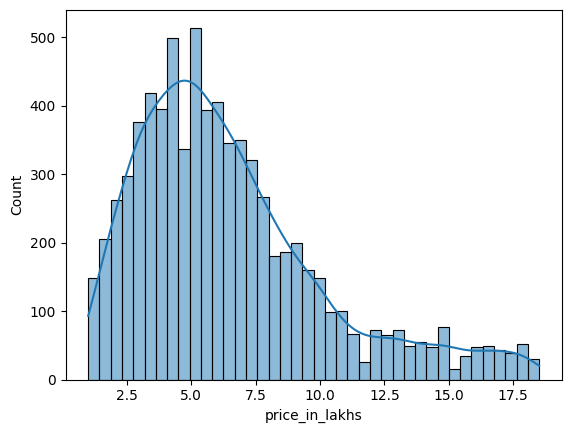

In [85]:
# Target variable
sns.histplot(filtered_df["price_in_lakhs"], kde=True)
plt.show()

### ii) Box Plot

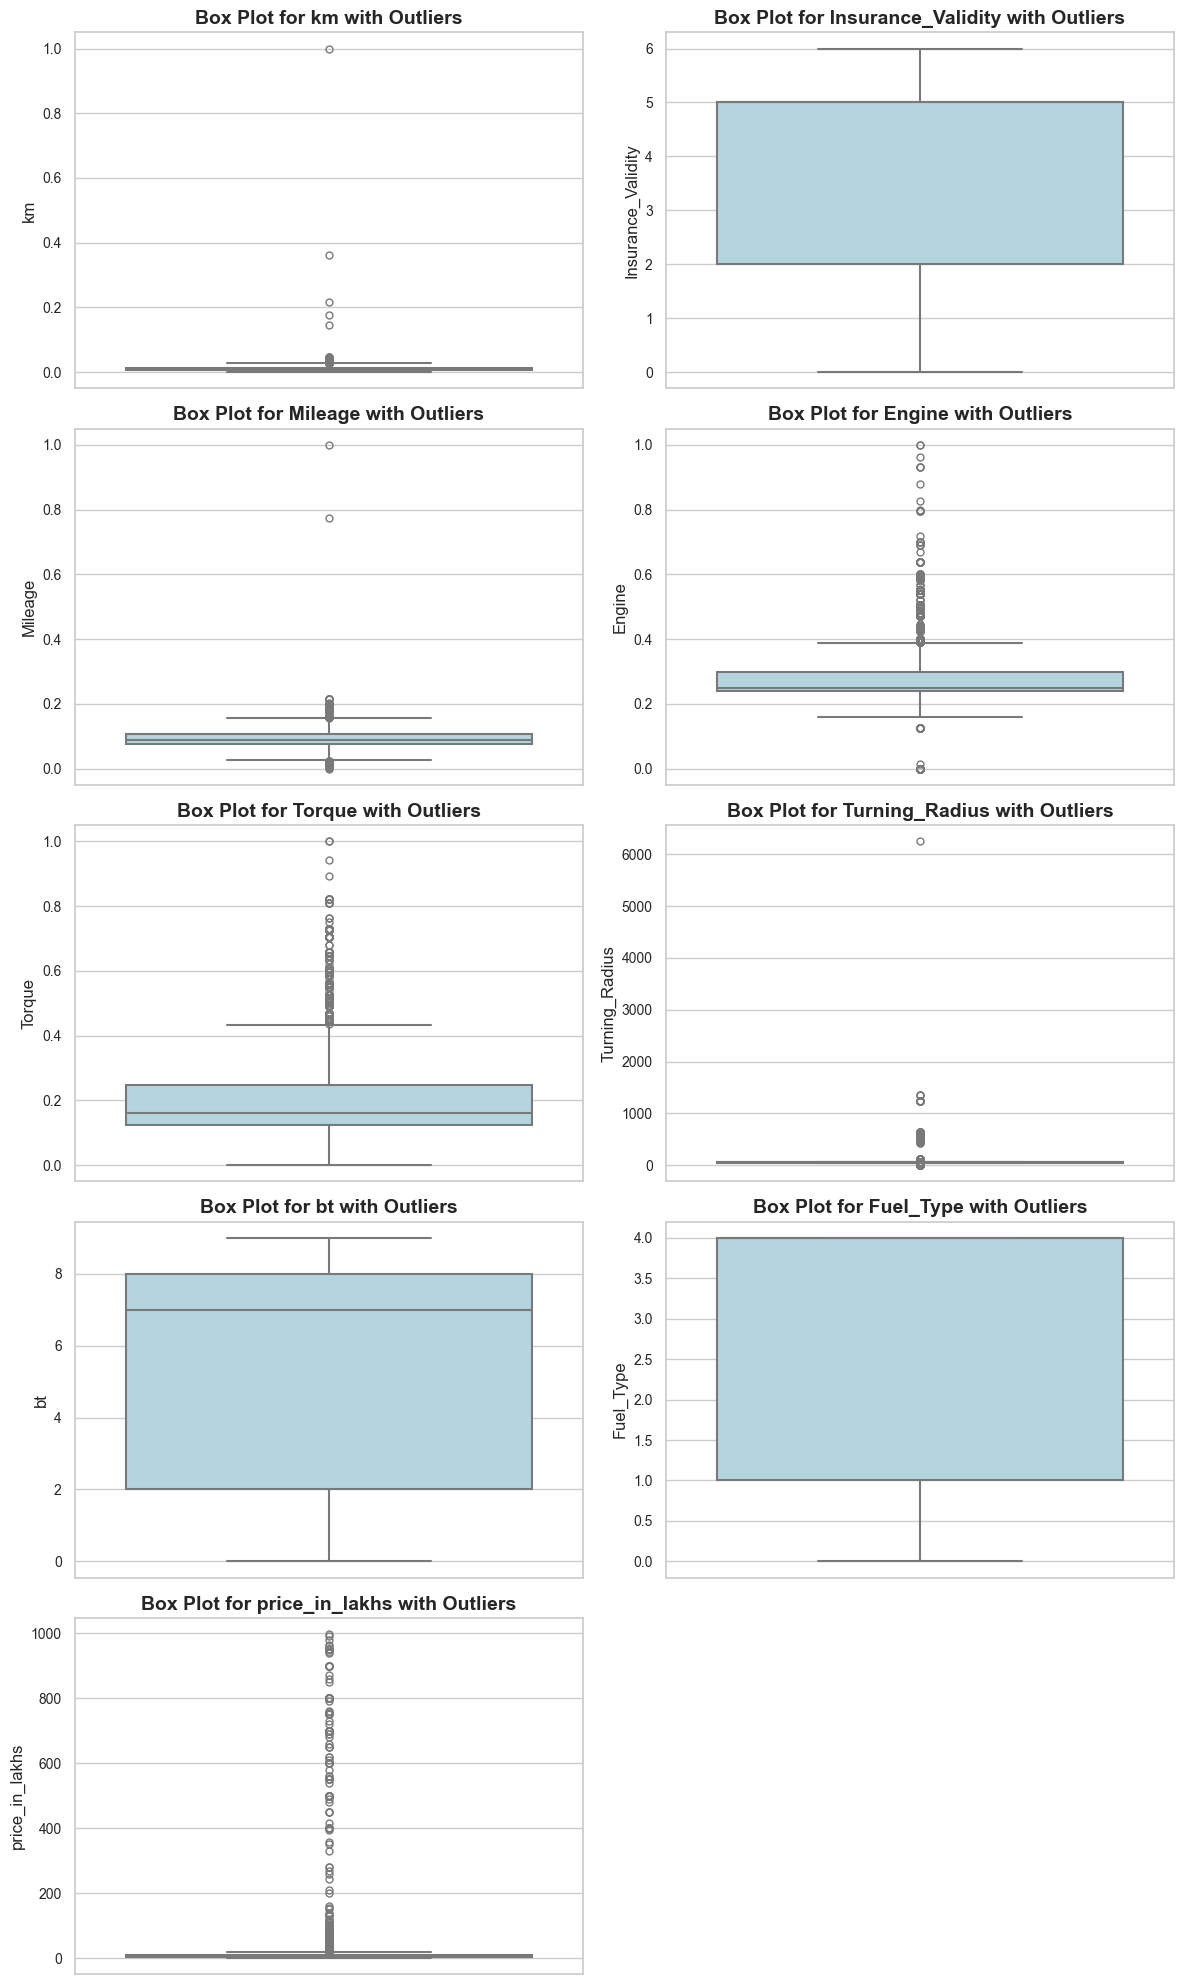

In [86]:
num_columns = len(col)
num_rows = (num_columns + 1) // 2
# Set a Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, num_rows * 4))

for i, column in enumerate(col, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(data=df, y=column, color="lightblue", fliersize=5, linewidth=1.5)
    plt.title(f'Box Plot for {column} with Outliers', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### iii) Heat map

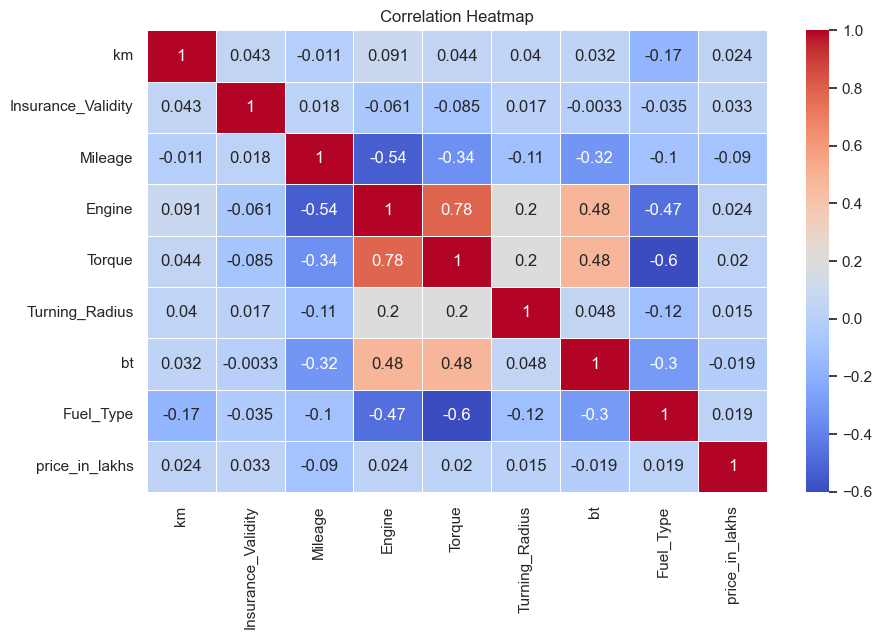

In [87]:
# Step 1: Select relevant columns for correlation
# We will focus on the specified columns: CustomerKey, ProductKey, StoreKey, and OrderNumber
correlation_data = df[col]

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Visualize the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### iv) Scatter plot

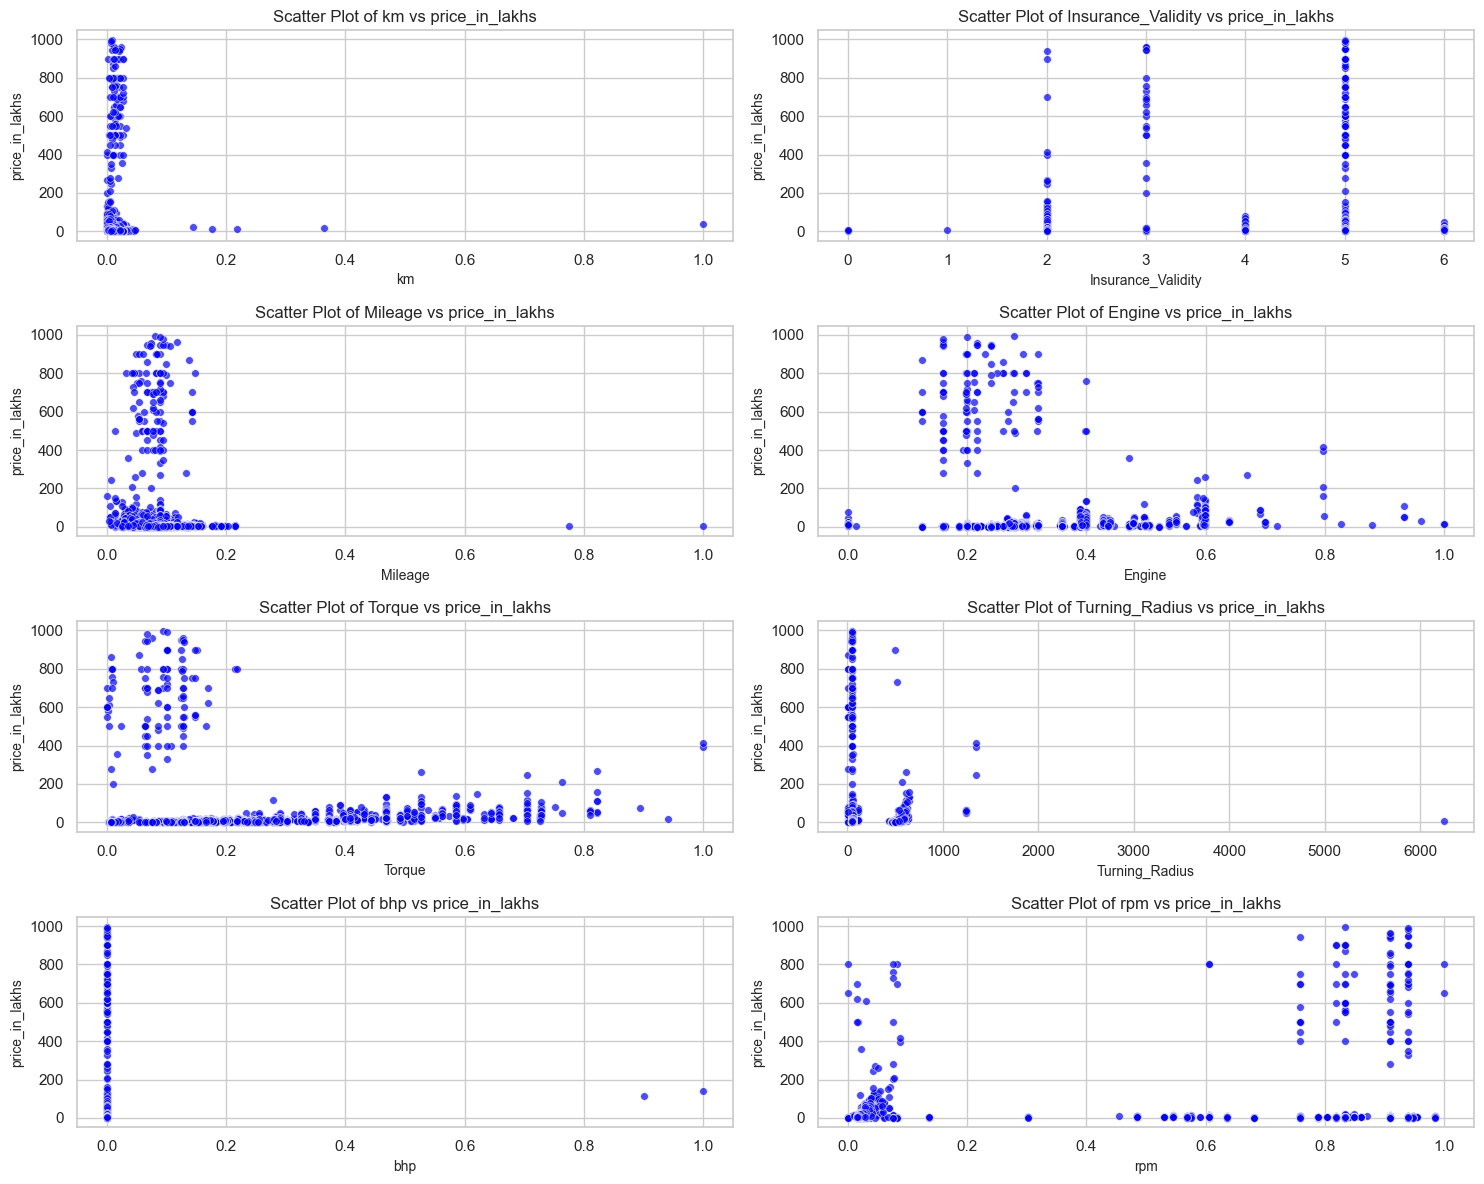

In [89]:
# Define the target variable and the columns you want to plot against it
target = "price_in_lakhs"  # Replace with your target column name
columns = ["km", "Insurance_Validity", "Mileage", "Engine", "Torque", "Turning_Radius", "bhp", "rpm"]

# Create subplots for each column
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns, start=1):
    plt.subplot(4, 2, i)  # Create a 4x2 grid of subplots
    sns.scatterplot(data=df, x=column, y=target, color="blue", s=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel(target, fontsize=10)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### v) Pair Plot

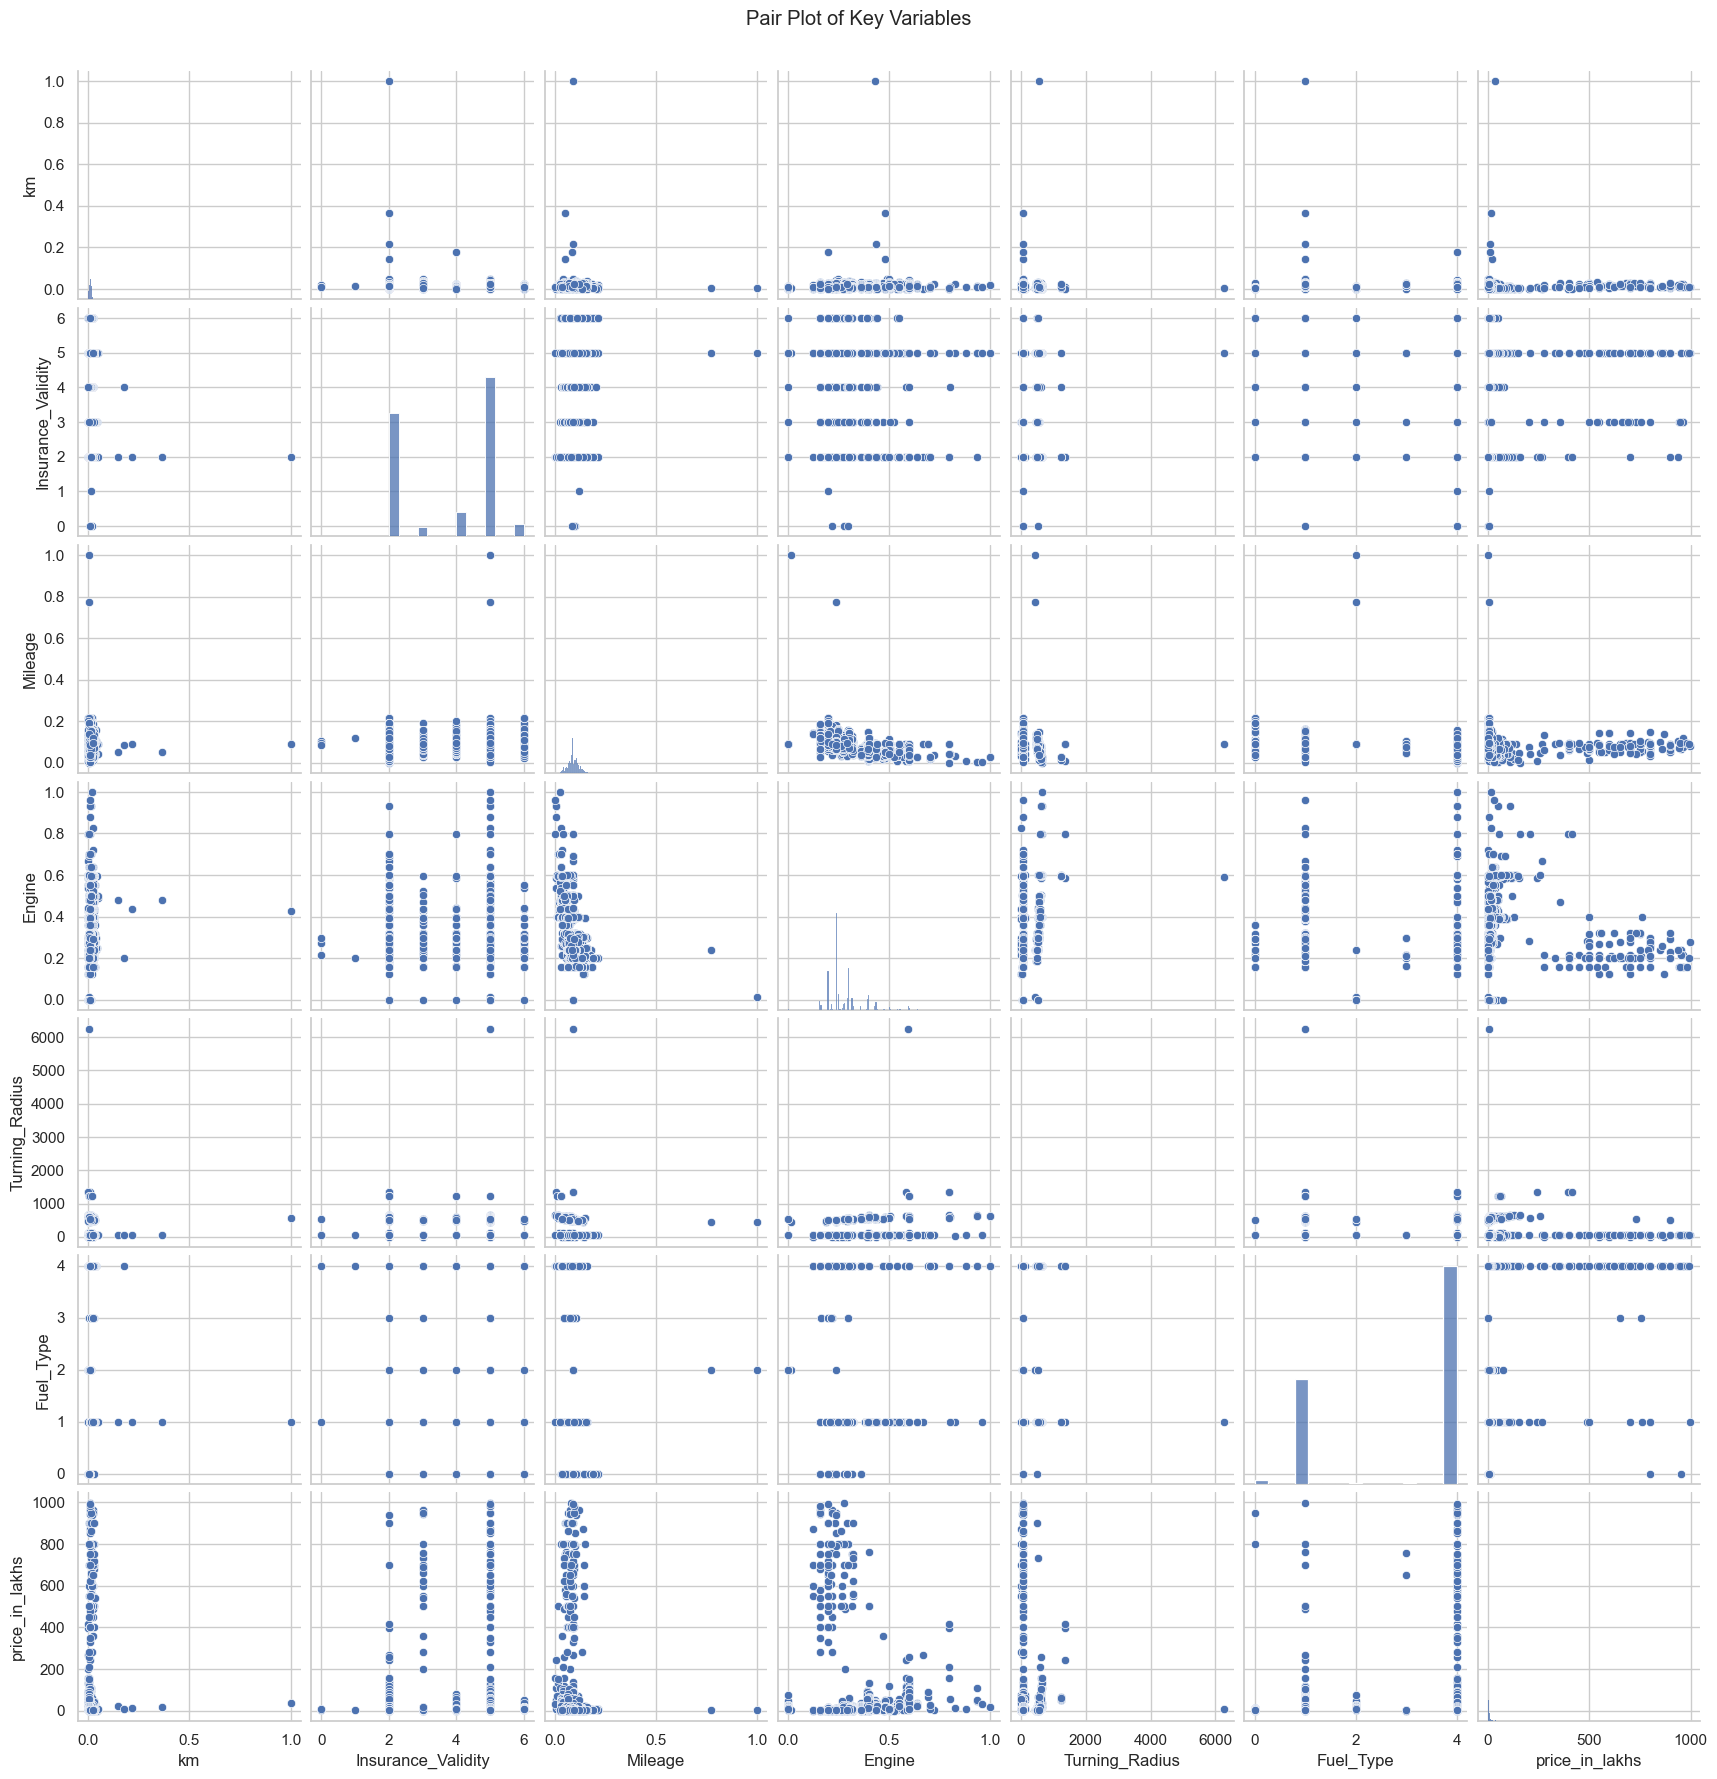

In [90]:
sns.pairplot(df[["km", "Insurance_Validity", "Mileage", "Engine", "Turning_Radius","Fuel_Type", "price_in_lakhs"]])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()
# sns.pairplot(df[['km', 'ownerNo', 'modelYear', 'Displacement', 'Top Speed', 'Mileage', 'price']])
# plt.suptitle('Pair Plot of Key Variables', y=1.02)
# plt.show()

In [91]:
df=filtered_df

## d) Feature Selection

## i) Correlation Analysis

In [92]:
df.corr()

,it,bt,km,ownerNo,oem,model,Insurance_Validity,Fuel_Type,Transmission,Features,...,Rear_Brake_Type,Top_Speed,No_Door_Numbers,Wheel_Size,Alloy_Wheel_Size,City,bhp,rpm,Reg_age,price_in_lakhs
it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bt,NaN,1.000000,0.078408,-0.005283,-0.072914,-0.062441,0.036695,-0.267322,-0.162621,0.054253,...,0.016324,0.278595,-0.594441,0.257180,0.257180,0.021208,0.027145,-0.638385,-0.041105,0.423625
km,NaN,0.078408,1.000000,0.192003,0.014699,0.030416,0.074073,-0.306030,0.086595,-0.061645,...,0.050304,0.057393,-0.087727,-0.097129,-0.097129,-0.032622,0.038611,-0.100864,0.405888,-0.166464
ownerNo,NaN,-0.005283,0.192003,1.000000,-0.047213,-0.033311,0.117514,-0.075173,0.003959,-0.101637,...,0.039856,0.020128,-0.075951,-0.123496,-0.123496,-0.072707,0.040490,-0.037159,0.378331,-0.201559
oem,NaN,-0.072914,0.014699,-0.047213,1.000000,0.988805,0.035139,-0.043493,0.018771,-0.017256,...,0.042496,-0.097562,0.110740,0.040403,0.040403,-0.002316,-0.053516,0.028151,-0.110020,0.001632
model,NaN,-0.062441,0.030416,-0.033311,0.988805,1.000000,0.038520,-0.058424,0.017272,-0.011341,...,0.062524,-0.074226,0.090743,0.024074,0.024074,-0.007694,-0.047794,0.007909,-0.082226,0.006603
Insurance_Validity,NaN,0.036695,0.074073,0.117514,0.035139,0.038520,1.000000,-0.077779,0.049663,-0.050901,...,0.018981,-0.007674,-0.029992,-0.060307,-0.060307,0.029401,0.023869,-0.036722,0.067102,-0.052303
Fuel_Type,NaN,-0.267322,-0.306030,-0.075173,-0.043493,-0.058424,-0.077779,1.000000,-0.040238,-0.009582,...,-0.002710,-0.107452,0.028654,-0.150700,-0.150700,-0.035837,0.024869,0.334517,-0.132201,-0.199766
Transmission,NaN,-0.162621,0.086595,0.003959,0.018771,0.017272,0.049663,-0.040238,1.000000,-0.096501,...,-0.032671,-0.228568,0.088311,-0.198494,-0.198494,0.077319,0.020921,0.244280,0.115087,-0.380497
Features,NaN,0.054253,-0.061645,-0.101637,-0.017256,-0.011341,-0.050901,-0.009582,-0.096501,1.000000,...,-0.016004,0.105101,0.029237,0.160906,0.160906,-0.018327,0.015972,-0.135590,-0.211449,0.199994


## ii) Feature Selection using model

In [93]:
X = df.drop(columns=["price_in_lakhs"])
y = df["price_in_lakhs"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5959, 45), (1490, 45), (5959,), (1490,))

In [95]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
fi = pd.DataFrame({"Features":X_train.columns, "Importance":rf.feature_importances_})

In [97]:
f_df = fi.sort_values(by="Importance", ascending=False)[0:17]
f_df

,Features,Importance
27,Width,0.406840
44,Reg_age,0.121651
13,Safety,0.110816
39,Wheel_Size,0.047984
40,Alloy_Wheel_Size,0.046458
26,Length,0.039963
10,Comfort_&_Convenience,0.025339
2,km,0.019712
41,City,0.017854
43,rpm,0.017202


In [98]:
X = df[f_df["Features"]]

In [99]:
X.to_csv("X.csv")

In [100]:
y

0       4.00
1       8.11
2       5.85
3       4.62
4       7.90
        ... 
8364    5.10
8365    1.80
8366    5.50
8367    1.40
8368    5.00
Name: price_in_lakhs, Length: 7449, dtype: float64

In [101]:
y.to_csv("y.csv")

In [102]:
feature_names = X.columns
feature_names

Index(['Width', 'Reg_age', 'Safety', 'Wheel_Size', 'Alloy_Wheel_Size',
       'Length', 'Comfort_&_Convenience', 'km', 'City', 'rpm',
       'Entertainment_&_Communication', 'bhp', 'Torque', 'Wheel_Base',
       'Exterior', 'Top_Speed', 'Interior'],
      dtype='object')